In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('aerofit_treadmill.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


Problem Statement:- 
Given Aerofit dataset having shape as (180,9) and columns as ('Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage','Fitness', 'Income', 'Miles').Aerofit is a leading brand in the field of fitness equipment.Our task is to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. 


Analysing basic metrics of given data:-

In [5]:
# shape of the data
df.shape

(180, 9)

In [7]:
# columns of the data
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [18]:
# checking for duplicated rows 
df.duplicated().sum()

0

In [8]:
# Non-Null count and Dtype of dataset-There are no null values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [19]:
# Description of unique,count and mean,standard deviation of given columns
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [11]:
#Value counts of product column in the given dataset
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [12]:
# Value Counts of MaritalStatus column in the dataset
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [6]:
# Value counts of Gender column in the dataset
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [13]:
# Value counts of age column in the dataset
df['Age'].value_counts()

Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: count, dtype: int64

In [37]:
df['Usage'].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [38]:
df['Fitness'].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [39]:
df['Miles'].value_counts()

Miles
85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: count, dtype: int64

In [8]:
df.groupby('Gender')['Education'].value_counts()

Gender  Education
Female  16           35
        14           30
        18            7
        15            2
        13            1
        21            1
Male    16           50
        14           25
        18           16
        13            4
        12            3
        15            3
        21            2
        20            1
Name: count, dtype: int64

In [9]:
df.groupby('Gender')['Usage'].value_counts()

Gender  Usage
Female  3        33
        2        20
        4        14
        5         7
        6         2
Male    4        38
        3        36
        2        13
        5        10
        6         5
        7         2
Name: count, dtype: int64

In [10]:
df.groupby('Gender')['Fitness'].value_counts()

Gender  Fitness
Female  3          45
        2          16
        4           8
        5           6
        1           1
Male    3          52
        5          25
        4          16
        2          10
        1           1
Name: count, dtype: int64

In [11]:
df.groupby('Gender')['Miles'].value_counts()

Gender  Miles
Female  85       13
        66        8
        75        6
        113       4
        106       4
        94        4
        47        4
        56        4
        95        4
        74        3
        200       3
        64        3
        38        3
        127       2
        100       2
        53        2
        21        1
        280       1
        212       1
        188       1
        180       1
        103       1
        42        1
Male    85       14
        95        8
        180       5
        160       5
        106       5
        100       5
        53        5
        47        5
        113       4
        94        4
        75        4
        150       4
        127       3
        120       3
        200       3
        170       3
        64        3
        42        3
        66        2
        56        2
        103       2
        132       2
        141       2
        169       1
        240       1
        300       1
      

In [14]:
df.groupby('Gender')['Age'].value_counts()

Gender  Age
Female  25     10
        23      7
        24      6
        26      6
        33      6
        28      5
        35      4
        31      3
        30      3
        29      3
        22      3
        21      3
        20      2
        40      2
        27      2
        34      2
        38      2
        37      2
        44      1
        46      1
        32      1
        50      1
        19      1
Male    25     15
        23     11
        24      6
        26      6
        27      5
        38      5
        22      4
        21      4
        30      4
        34      4
        35      4
        28      4
        40      3
        32      3
        31      3
        19      3
        29      3
        20      3
        33      2
        45      2
        47      2
        48      2
        36      1
        18      1
        39      1
        41      1
        42      1
        43      1
Name: count, dtype: int64

In [36]:
df.groupby('Product')['Income'].mean()

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

In [21]:
df[df['Gender']=='Male'].groupby('Gender')['Age'].mean()

Gender
Male    28.951923
Name: Age, dtype: float64

In [22]:
df[df['Gender']=='Female'].groupby('Gender')['Age'].mean()

Gender
Female    28.565789
Name: Age, dtype: float64

In [23]:
df[df['Gender']=='Female'].groupby('Gender')['Miles'].mean()

Gender
Female    90.013158
Name: Miles, dtype: float64

In [24]:
df[df['Gender']=='Male'].groupby('Gender')['Miles'].mean()

Gender
Male    112.826923
Name: Miles, dtype: float64

In [25]:
df[df['Gender']=='Male'].groupby('Gender')['Income'].mean()

Gender
Male    56562.759615
Name: Income, dtype: float64

In [26]:
df[df['Gender']=='Female'].groupby('Gender')['Income'].mean()

Gender
Female    49828.907895
Name: Income, dtype: float64

In [27]:
df[df['Gender']=='Male'].groupby('Gender')['Usage'].mean()

Gender
Male    3.653846
Name: Usage, dtype: float64

In [28]:
df[df['Gender']=='Female'].groupby('Gender')['Usage'].mean()

Gender
Female    3.184211
Name: Usage, dtype: float64

In [29]:
df[df['Gender']=='Male'].groupby('Gender')['Fitness'].mean()

Gender
Male    3.519231
Name: Fitness, dtype: float64

In [30]:
df[df['Gender']=='Female'].groupby('Gender')['Fitness'].mean()

Gender
Female    3.026316
Name: Fitness, dtype: float64

In [31]:
df[df['Gender']=='Male'].groupby('Gender')['Education'].mean()

Gender
Male    15.701923
Name: Education, dtype: float64

In [32]:
df[df['Gender']=='Female'].groupby('Gender')['Education'].mean()

Gender
Female    15.394737
Name: Education, dtype: float64

In [21]:
df.groupby(['MaritalStatus', 'Gender']).size()

MaritalStatus  Gender
Partnered      Female    46
               Male      61
Single         Female    30
               Male      43
dtype: int64

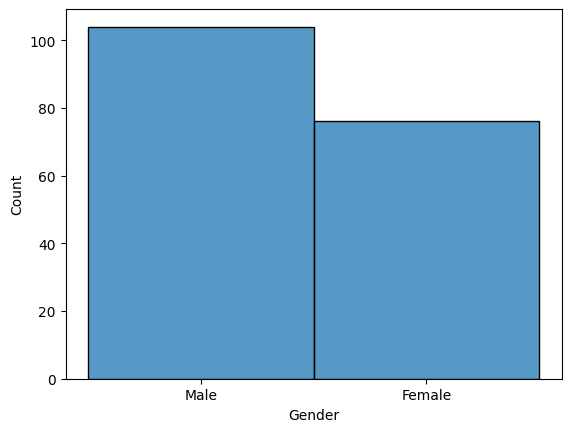

In [5]:
#Plotting gender composition using seaborn barplot
sns.histplot(data=df,x='Gender')
plt.show()

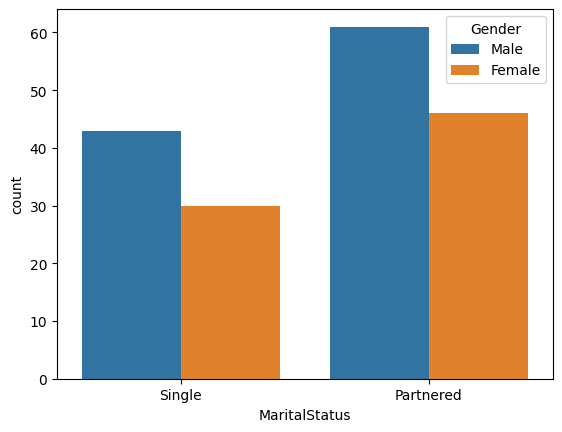

In [37]:
#plotting Marital status gender wise using countplot of seaborn
sns.countplot(data=df,x='MaritalStatus',hue='Gender')
plt.show()

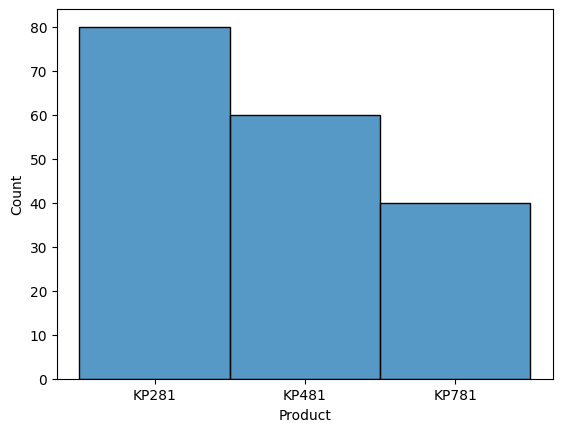

In [9]:
# plotting product composition using seaborn histplot
sns.histplot(data=df,x='Product')
plt.show()

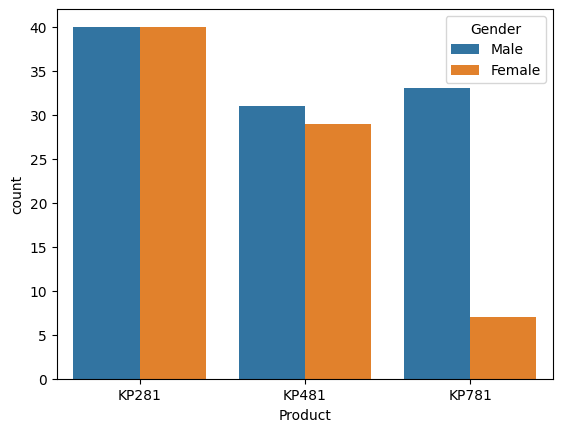

In [12]:
#plotting countplot of product composition gender wise
sns.countplot(data =df,x='Product',hue='Gender')
plt.show()

Inference:--
1) Equal number of males and females have purchased KP281 product 
2) The number of male customers who bought KP481 is slightly more than female customers
3) In case of KP781 product,majority who bought them are male customers.

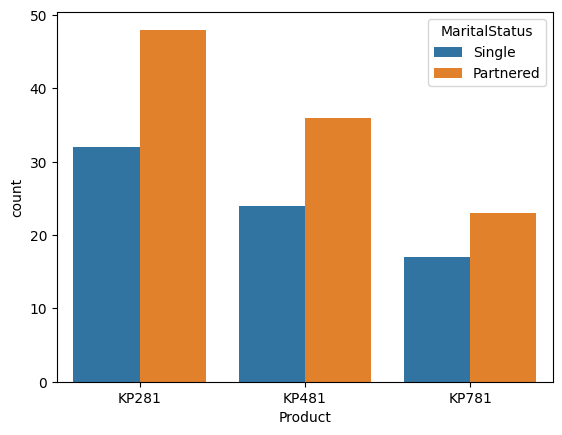

In [13]:
# plotting countplot of product composition Marital status wise 
sns.countplot(data =df,x='Product',hue='MaritalStatus')
plt.show()

Observation:--
1) Partnered customers have clear majority over single customers in every type of product.

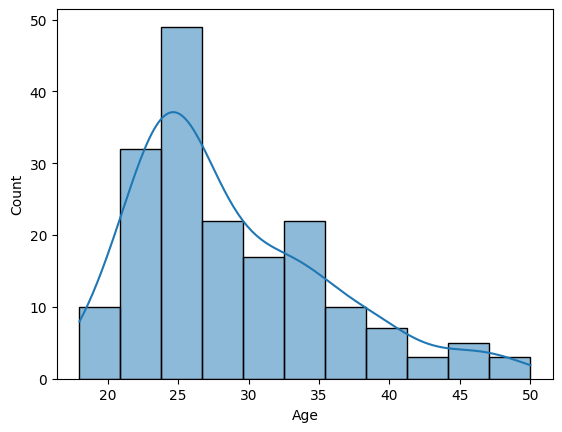

In [14]:
#Plotting Age composition of given datatset
sns.histplot(data=df, x="Age", kde=True)
plt.show()

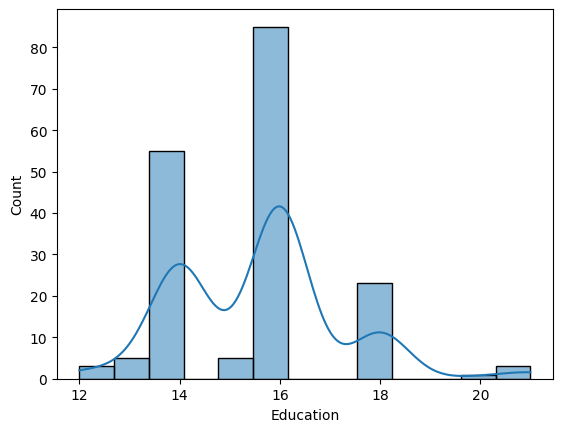

In [15]:
# Plotting Education composition of dataset
sns.histplot(data=df, x="Education", kde=True)
plt.show()

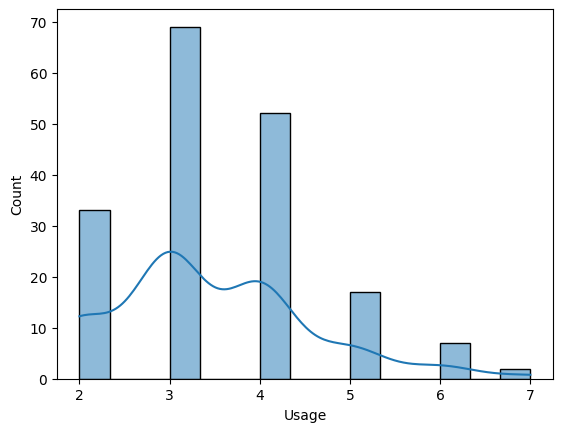

In [16]:
#Plotting Usage composition of dataset
sns.histplot(data=df, x="Usage", kde=True)
plt.show()

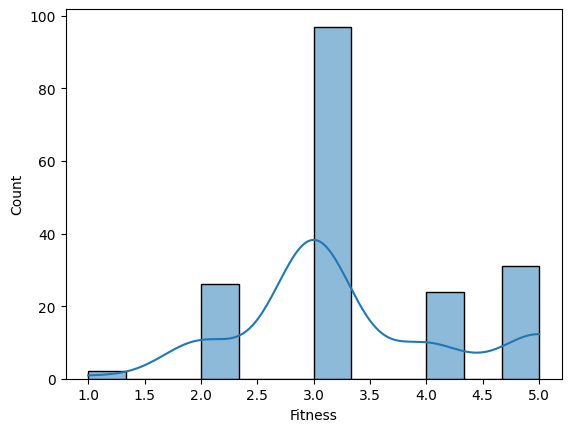

In [17]:
#Plotting Fitness composition of dataset
sns.histplot(data=df, x="Fitness", kde=True)
plt.show()

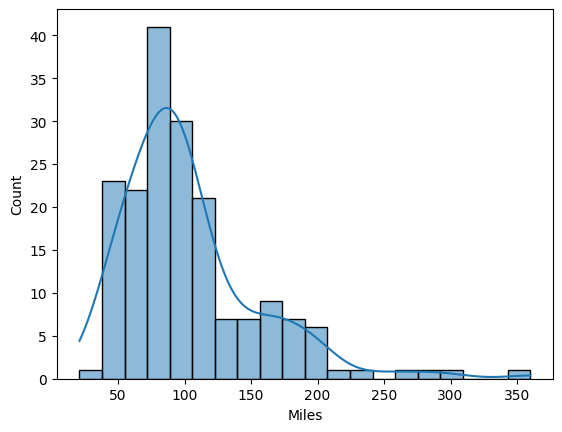

In [18]:
#Plotting Miles composition of dataset
sns.histplot(data=df, x="Miles", kde=True)
plt.show()

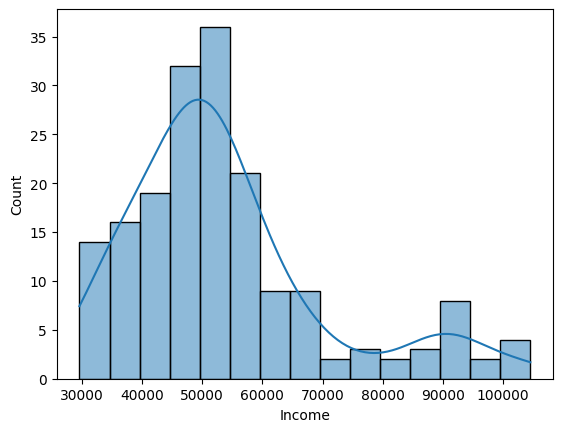

In [19]:
# Plotting Income composition of dataset
sns.histplot(data=df, x="Income", kde=True)
plt.show()

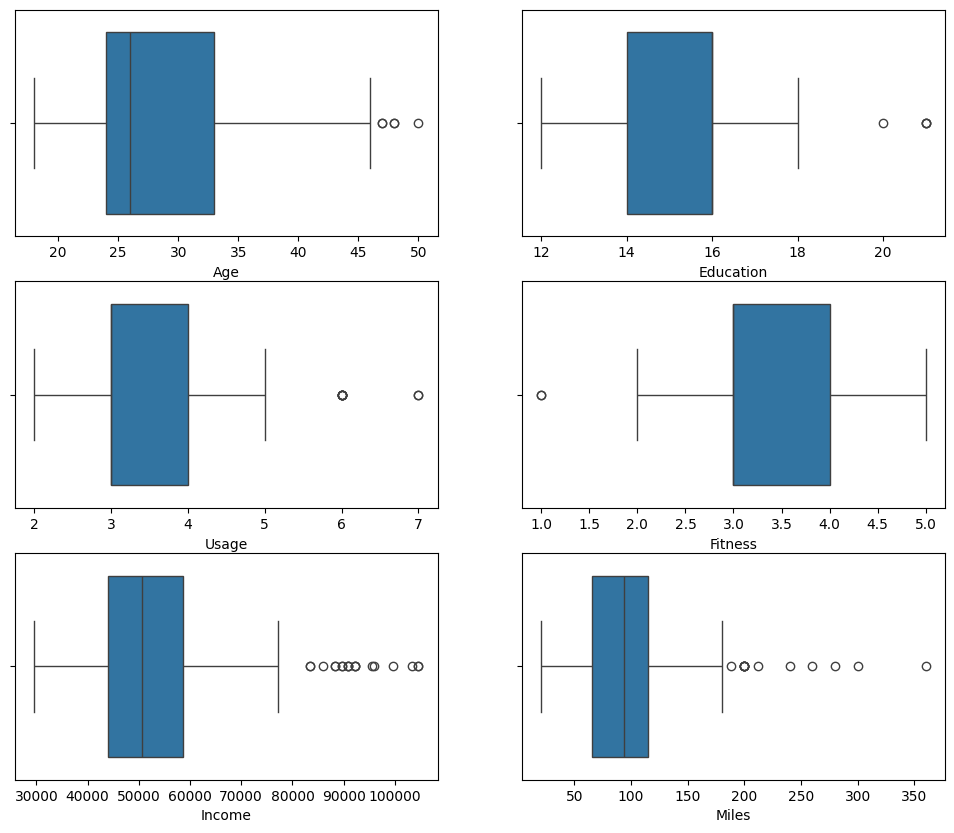

In [25]:
# Plotting boxplots of various attributes of the given dataset
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
sns.boxplot(data=df, x='Age',ax=axis[0,0])
sns.boxplot(data=df, x='Education', ax=axis[0,1])
sns.boxplot(data=df, x='Usage', ax=axis[1,0])
sns.boxplot(data=df, x='Fitness', ax=axis[1,1])
sns.boxplot(data=df, x='Income', ax=axis[2,0])
sns.boxplot(data=df, x='Miles', ax=axis[2,1])
plt.show()

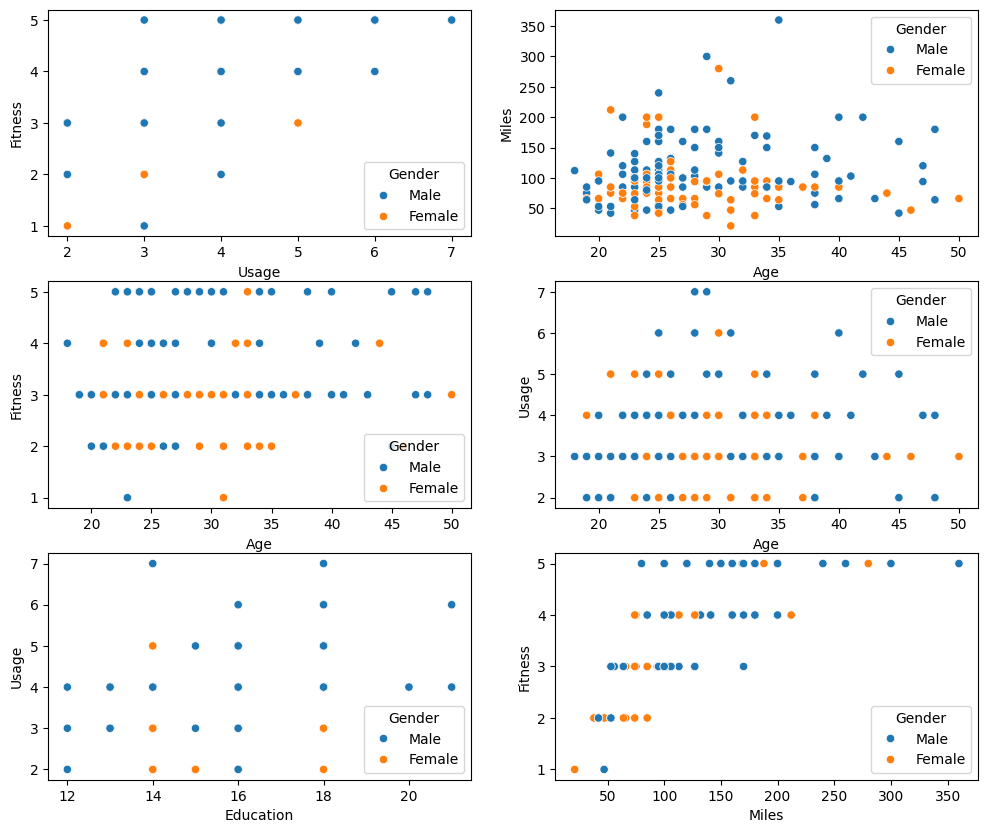

In [35]:
# scatterplots to compare different attributes
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
sns.scatterplot(data=df, x='Usage',y='Fitness',hue='Gender',ax=axis[0,0])
sns.scatterplot(data=df, x='Age',y='Miles',hue='Gender',ax=axis[0,1])
sns.scatterplot(data=df, x='Age',y='Fitness',hue='Gender',ax=axis[1,0])
sns.scatterplot(data=df, x='Age',y='Usage',hue='Gender',ax=axis[1,1])
sns.scatterplot(data=df, x='Education',y='Usage',hue='Gender',ax=axis[2,0])
sns.scatterplot(data=df, x='Miles',y='Fitness',hue='Gender',ax=axis[2,1])
plt.show()


Observations:-
1) Most of the male customers have high fitness according to the usage rate of 3,4
2) Female customers have low fitness when compared to the male customers
3) The majority of customers who are expected to go for walk/run greater than 150 miles are male.
4) There is a clear majority of males in fitness rate of 4,5.while females are lagging in the fitness rate with majority under 2,3.
5) Most of the customers above 40 are males having fitness as 3,4,5
6) Most of the customers having 16,18 years of eduaction are males with all rates of usage.

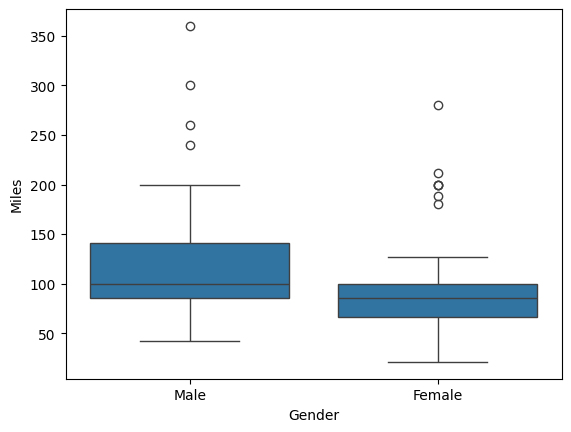

In [58]:
# Boxplot to compare Miles and Gender 
sns.boxplot(data=df, y='Miles', x='Gender')
plt.show()

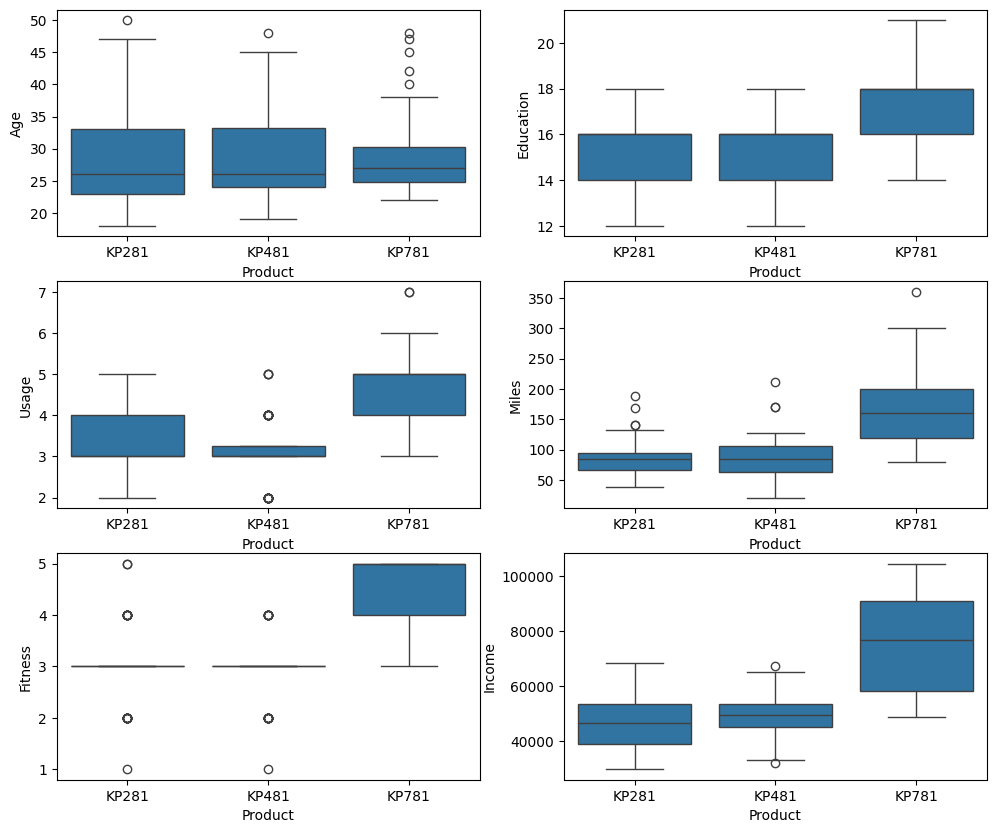

In [63]:
#Boxplots to compare different attributes of the given dataset
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
sns.boxplot(data=df, x='Product',y='Age',ax=axis[0,0])
sns.boxplot(data=df, x='Product',y='Education',ax=axis[0,1])
sns.boxplot(data=df, x='Product',y='Usage',ax=axis[1,0])
sns.boxplot(data=df, x='Product',y='Miles',ax=axis[1,1])
sns.boxplot(data=df, x='Product',y='Fitness',ax=axis[2,0])
sns.boxplot(data=df, x='Product',y='Income',ax=axis[2,1])
plt.show()

Observations:--
1) Customers purchasing products KP281 & KP481 are having same age median value.
2) Customers whose age lies between 25-30 are more likely to buy KP781 product
3) Customers whose Education is greater than 16 are more likely to purchase KP781 product.
4) While the customers with Education less than 16 are equally likely to purchase KP281 or KP481 products.
5) Customers who are planning to use the treadmill greater than 4 times are more likely to purchase KP781 product.
6) customers having fitness >= 3 are more likely to purchase the KP781 product.
7) customers having Income >= 60000 are more likely to purchase the KP781 product.
8) customers having exercise of approximately 120 Miles per week are more likely to buy KP781 product.

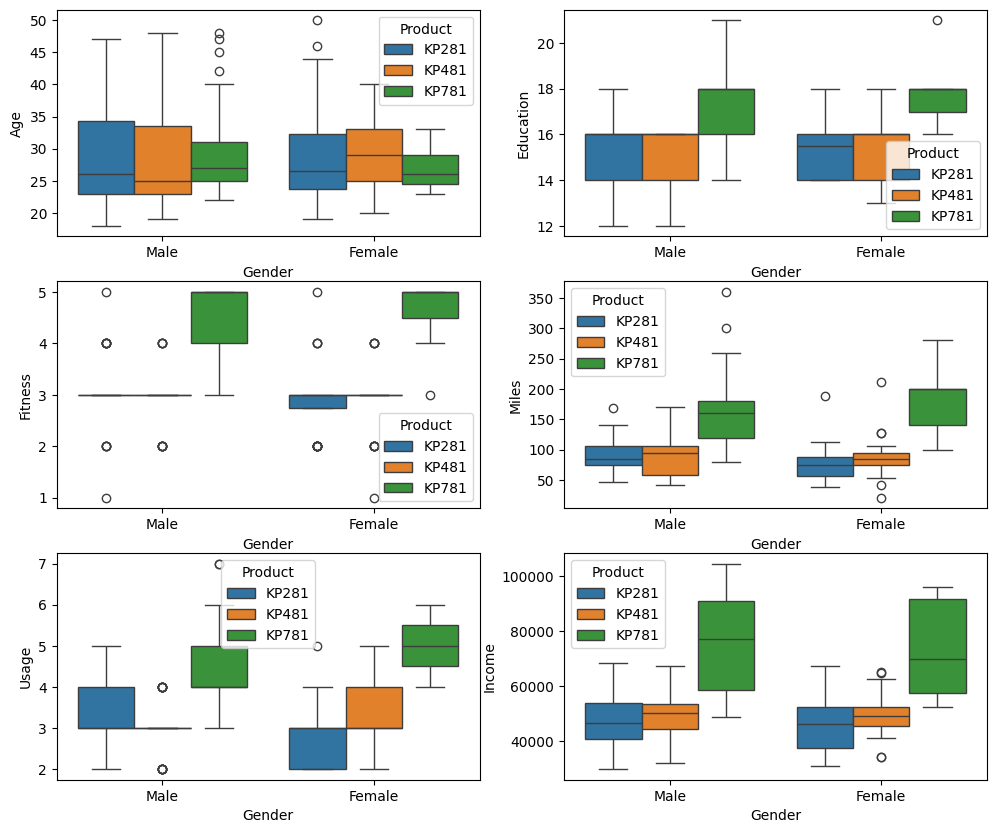

In [3]:
#Boxplots of different attributes of data vs gender-product wise
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
sns.boxplot(data=df, x='Gender',y='Age',hue='Product',ax=axis[0,0])
sns.boxplot(data=df, x='Gender',y='Education',hue='Product',ax=axis[0,1])
sns.boxplot(data=df, x='Gender',y='Fitness',hue='Product',ax=axis[1,0])
sns.boxplot(data=df, x='Gender',y='Miles',hue='Product',ax=axis[1,1])
sns.boxplot(data=df, x='Gender',y='Usage',hue='Product',ax=axis[2,0])
sns.boxplot(data=df, x='Gender',y='Income',hue='Product',ax=axis[2,1])
plt.show()

In [4]:
#Marginal probabilities of using given products 
df['Product'].value_counts(normalize=True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

In [9]:
#Crosstab of Gender vs product
df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']],normalize=True)
df1

Product,KP281,KP481,KP781
Gender,,,
Female,0.222222,0.161111,0.038889
Male,0.222222,0.172222,0.183333


In [14]:
#probabilities of each product gender wise
probabilities = df1.apply(lambda row: row / row.sum(), axis=1)
probabilities

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


In [13]:
# summary of  Marital Status vs product using crosstab
df2 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
df2

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


In [15]:
#Probabilities of products - Marital status wise
prob = df2.apply(lambda row:row/row.sum(),axis=1)
prob

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877


In [5]:
df['Miles'].mean()

103.19444444444444

In [6]:
df['Miles'].std()

51.86360466180931

In [9]:
Q1 = df['Miles'].quantile(0.25)
Q3 = df['Miles'].quantile(0.75)

IQR = Q3 - Q1
IQR

48.75

In [11]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Miles'] < lower_bound) | (df['Miles'] > upper_bound)]
outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


Observations:-
1) There are no missing values and duplicated values in the given dataset.
2) There are 3 unique product types in the dataset-KP281,KP481,KP781
3) KP281 is the top product used by customers.
4) Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.
5) 75% of persons are having education <= 16 years.
6) Mean Income of the given dataset is 53719/-
7) Mean miles of the given dataset is 103.2
8) Of these 180 rows - 104 belong to male and 76 are of female
9) Customers having marital status as partnered are more than singles i.e 107 vs 73 respectively
10) Age, Education and Usage are having very few outliers.While Income and Miles are having more outliers.
11) There is a good amount of difference among male(180,160) and female(113,106) on the number of miles that are to be covered.
12) The KP-781 product has more average number of miles the customer expects to walk/run each week.

---Recommendations---
1) The male customers are dominant.Additional features tailor-made for women and discounts are to be provided to attract women customers.
2) The customers of age above 35 and below 50 are low.so they are to be focused up on by providing incentives with the purchase like health checkups etc 
3) customers having 13,15,20 years of education are to be focused up on
4) The customers having marital status as 'single' are to be focused up on
5) customers of age above 50 in both male and female are to be focused up on
6) The usage and fitness are directly proportional and female customers are lagging behind in both fitness and usage.So these issues are to be focused up on
7) The mean usage,miles,fitness of male customers are greater than female customers.This disparity should be worked up on
8) The selling strategies of products KP481,KP781 are be focused up on
   